In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Upload DATA
train_set = pd.read_csv('drive/My Drive/DATA/titanic/train.csv')
test_set = pd.read_csv('drive/My Drive/DATA/titanic/test.csv')
test_labels = pd.read_csv('drive/My Drive/DATA/titanic/gender_submission.csv')

**Look for datatype info and non-null**

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
matrix_corr = train_set.corr()
matrix_corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [15]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass 
---

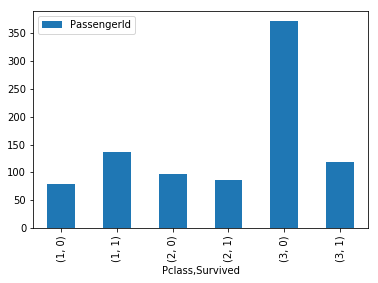

In [16]:
# Bar (class, Survived)
data_plot = train_set.groupby(['Pclass', 'Survived']).count()
data_plot[['PassengerId']].plot(kind='bar')

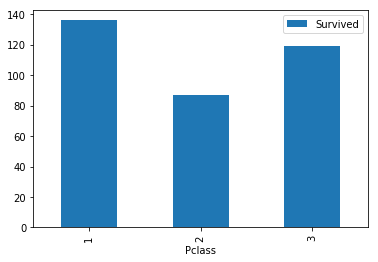

In [17]:
data = train_set[['Pclass', 'Survived']].groupby('Pclass', axis=0).sum()

data.plot(kind='bar', )

S
---


In [39]:
sex_set = train_set[['Sex', 'Survived']].head()
sex_set[sex_set=='female'].sum()['Survived']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0.0

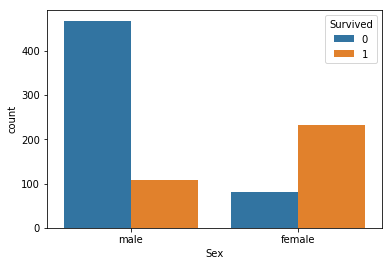

In [25]:
x = train_set['Sex']
y = train_set['Survived']

sns.countplot(x='Sex', hue='Survived', data=train_set)

ValueError: ignored

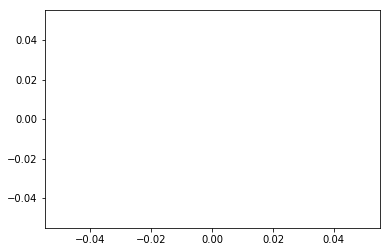

In [81]:
female_set = train_set[train_set['Sex']=='female']
male_set = train_set[train_set['Sex']=='male']

figure, ax = plt.subplots(1, 1)

#female_set.plot(kind='hist', x='Survived', y='Age', bins=20, alpha=0.3, ax=ax, label='female')
#male_set.plot(kind='hist', x='Survived', y='Age', bins=20, alpha=0.2, ax=ax, label='male')

sns.distplot(female_set[female_set['Survived']==0]['Age'].dropna(), ax=ax)


ValueError: ignored